# <b> The Battle of Neighborhoods
### <b> Capstone project for Coursera IBM Data science professional certificate

### <b> Pierayeh Vahdani

### Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Analysis](#results)
* [Discussion](#results)
* [Conclusion](#conclusion)

# Introduction: Business Problem 

Vancouver with a population of 2,581,000 and Toronto with a population of 6,197,000 are Canada's two metropolitan cities. Although Vancouver has a population of about less than half of that of Toronto but it is still competing very closely with Toronto in terms of restaurants  and cafes. 

&nbsp;&nbsp;&nbsp;&nbsp;In this project, I will compare the neighborhood of the two city. This report is specifically targeted a chain restaurant that would like to open a new branch in each city and tries to search to find the best
location and a customized menu for each location. The chain considers 2 factors to decide about the location and the menu as follow: 

   1. The location should be in a popular neighborhood that can attract visitors. 
   2. The menu for each location should includes foods that are less offered by other restaurants in the         that neighborhood.  

# Data 

Following data sources will be needed to extract/generate the required information:
1. centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using **Wikipedia**
2. number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**
3. coordinate of Vancouver will be obtained using ** The government of British Columbi's BC Address Geocoder website **. 

# Methodeology 

Based on definition of our problem, factors that will influence our decision are:

1. Location: 
* Number of existing restaurants and other public venues such as parks, beaches, museums in the neighborhood. 
* Distance of neighborhood from city center. 
2. The menu:
* The dishes that are less offered by the restaurants in that neighborhood.  

# Results and Analysis 

## Segmenting and Clustering Neighborhoods in Vancouver

In this notebook I explored, segmented, and clustered the neighborhoods in the city of Vancouver. 
For the Vancouver neighborhood data, I used a Wikipedia page that has information I need to explore and cluster the neighborhoods in Vancouver. I collected the data for Vancouver neighborhood (The focus of this project is to explore merely the neighborhoods in downtown Vancouver and the city of Vancouver, therefor I only extract the data related to the postal codes in this two areas of lower mainland). I wrangled the data, cleaned it, and then read it into a pandas dataframe so that it is in a structured format.
Once the data is in a structured format, I explored and clustered the neighborhoods.

In [39]:
#installing Folium
import sys
!{sys.executable} -m pip install folium

In [40]:
#installing Folium
import sys
!{sys.executable} -m pip install geopy

In [41]:
#importing required libraries for this project

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [42]:
import requests
import pandas as pd 

## Part 1: Creating a notebook by collecting the data from the Wikipedia page containing Vancouver neighborhood information.

Data from Wikipedia containing the borough, neighborhoods, and the associated postal codes is collected and converted to a pandas dataframe

In [43]:
df0=pd.read_csv('Vancouver_PostalCode.csv')

Data including Vancouver borough, postal codes, and their corresponding geographical information is obtained from the government of BC address Geocoder website and converted to a pandas dataframe

In [44]:
df1= pd.read_csv('addresses.csv')


In [45]:
df0.head()

,PostalCode,Borough,Neighborhood
0,V5K,Vancouver,"North Hastings, Sunrise"
1,V5L,Vancouver,"North grandview, Woodland"
2,V5M,Vancouver,"South Hastings, Sunrise, North Renfrew- Collin..."
3,V5N,Vancouver,"South Grandview, Woodland, Ne Kensington, Ceda..."
4,V5P,Vancouver,"SE Kensington, Cedar Cottage, Victoria drive, ..."


In [46]:
df1=df1[['X', 'Y', 'PostalCode']]

In [47]:
df1.head()

,X,Y,PostalCode
0,-123.142289,49.303832,V5K
1,-123.142289,49.303832,V5L
2,-123.034651,49.249830,V5M
3,-123.067986,49.249830,V5N
4,-123.067984,49.216496,V5P


In the next few columns I renamed some columns and reindex the dataframe

In [48]:
Vancouver_Geo=df1.rename({'X': 'Latitude', 'Y': 'Longitude'}, axis=1)

In [49]:
Vancouver_Ne=df0.rename({'Borough ': 'Borough'}, axis=1)

In [50]:
Vancouver_Ne.groupby('PostalCode')

In [51]:
Vancouver_Geo.columns

Index(['Latitude', 'Longitude', 'PostalCode'], dtype='object')

In [52]:
Vancouver_Geo=Vancouver_Geo.rename({'Latitude':'Longitude', 'Longitude':'Latitude'}, axis=1)

In [53]:
Vancouver_Geo.head()

,Longitude,Latitude,PostalCode
0,-123.142289,49.303832,V5K
1,-123.142289,49.303832,V5L
2,-123.034651,49.249830,V5M
3,-123.067986,49.249830,V5N
4,-123.067984,49.216496,V5P


In [54]:
Vancouver_Ne.head()

,PostalCode,Borough,Neighborhood
0,V5K,Vancouver,"North Hastings, Sunrise"
1,V5L,Vancouver,"North grandview, Woodland"
2,V5M,Vancouver,"South Hastings, Sunrise, North Renfrew- Collin..."
3,V5N,Vancouver,"South Grandview, Woodland, Ne Kensington, Ceda..."
4,V5P,Vancouver,"SE Kensington, Cedar Cottage, Victoria drive, ..."


In [55]:
Vancouver_Geo.groupby('PostalCode')

In [56]:
Vancouver_Ne.shape

(31, 3)

In [57]:
Vancouver_Geo.shape

(30, 3)

The two sets of data are merged together

In [58]:
Van_data=Vancouver_Ne.merge(Vancouver_Geo, on='PostalCode', how='inner')


In [59]:
Van_data

,PostalCode,Borough,Neighborhood,Longitude,Latitude
0,V5K,Vancouver,"North Hastings, Sunrise",-123.142289,49.303832
1,V5L,Vancouver,"North grandview, Woodland",-123.142289,49.303832
2,V5M,Vancouver,"South Hastings, Sunrise, North Renfrew- Collin...",-123.034651,49.249830
3,V5N,Vancouver,"South Grandview, Woodland, Ne Kensington, Ceda...",-123.067986,49.249830
4,V5P,Vancouver,"SE Kensington, Cedar Cottage, Victoria drive, ...",-123.067984,49.216496
5,V5R,Vancouver,"South Renfrew, Collingwood",-123.139155,49.300742
6,V5S,Vancouver,Killarney,-123.034650,49.216497
7,V5T,Vancouver,East Mount Pleasant,-123.154222,49.226656
8,V5V,Vancouver,"West Kensington, Cedar Cottage, North East Ri...",-123.075078,49.249125
9,V5W,Vancouver,"South East Riley, Park Little Mountain, SW Ken...",-123.084651,49.216496


In [60]:
Van_data.columns

Index(['PostalCode', 'Borough', 'Neighborhood', 'Longitude', 'Latitude'], dtype='object')

In [61]:
Van_data.shape

(30, 5)

In [62]:
len (Van_data['Borough'].unique())

2

## Part 2: Finding the geographical locations (lat and long) of each neighborhood in Vancouver

In [63]:
address = 'Vancouver'

geolocator = Nominatim(user_agent="Van_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


In [64]:
# create map of New York using latitude and longitude values
map_Vancouver = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Van_data['Latitude'], Van_data['Longitude'], Van_data['Borough'], Van_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Vancouver)  
    
map_Vancouver

**Created the map of Vancouver using the geographcal data**

## Part 3: Use FourSquare to explore and cluster venues in Vancouver 

In this section:
1. I used FourSquare to get 100 venues in Vancouver 
2. Explored and clustered the neighborhoods in Vancouver
3. Generated maps to visualize neighborhoods and how they cluster together

In [65]:
CLIENT_ID = 'VP35KICHELLPBIIZ4FGYVHJHBC2F4WWFXVNBMLXR4BUXJOTB' # your Foursquare ID
CLIENT_SECRET = 'DKQ55RQV5WLNTFAUMK04GTFF4UM34CHBIO5FA2ZIXH3HA1V2' # your Foursquare Secret
VERSION = '20200531'

In [66]:
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VP35KICHELLPBIIZ4FGYVHJHBC2F4WWFXVNBMLXR4BUXJOTB
CLIENT_SECRET:DKQ55RQV5WLNTFAUMK04GTFF4UM34CHBIO5FA2ZIXH3HA1V2


#### Let's explore the first neighborhood in our dataframe.

In [67]:
Van_data.loc[0, 'Neighborhood']

'North Hastings, Sunrise'

In [68]:
neighborhood_latitude = Van_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Van_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Van_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of North Hastings, Sunrise are 49.3038316, -123.14228870000001.


#### Now, let's get the top 100 venues that are in Vancouver within a radius of 500 m.

In [69]:
search_query= 'Top 100 Venues'
LIMIT=100
radius=500

In [70]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [71]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eea95926d8c56002862d25e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Stanley Park',
  'headerFullLocation': 'Stanley Park, Vancouver',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 6,
  'suggestedBounds': {'ne': {'lat': 49.308331604500005,
    'lng': -123.13540024313264},
   'sw': {'lat': 49.2993315955, 'lng': -123.14917715686738}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bf9d57e8f32ef3b12c504aa',
       'name': 'Stanley Park',
       'location': {'address': 'Stanley Park Dr',
        'lat': 49.302488447038236,
        'lng': -123.14171791076662,
        'labeledLatLngs': [{'label': 'display',
          'lat': 

**As all the information is in the 'items' key, I used the 'get_category_type' **function.**

In [72]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Then clean the json file and structure it into a *pandas* dataframe.

In [73]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Stanley Park,Park,49.302488,-123.141718
1,Wren Trail,Trail,49.302527,-123.142399
2,Propesct Point Picnic Site,Park,49.303014,-123.146194
3,Beaver Lake,Lake,49.305053,-123.138252
4,Squirrel trail,Trail,49.303553,-123.147097
5,Beaver Lake Trail,Trail,49.303440,-123.137298


In [74]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

6 venues were returned by Foursquare.


The function below will repeat the same process to all the neighborhoods in Vancouver

In [75]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [76]:
Vancouver_venues = getNearbyVenues(names=Van_data['Neighborhood'],
                                   latitudes=Van_data['Latitude'],
                                   longitudes=Van_data['Longitude']
                                  )



North Hastings, Sunrise
North grandview, Woodland
South Hastings, Sunrise, North Renfrew- Collingwod
South Grandview, Woodland, Ne Kensington, Cedaar Cottage
SE Kensington, Cedar Cottage, Victoria drive, Fraserview 
South Renfrew, Collingwood
Killarney
East Mount Pleasant
 West Kensington, Cedar Cottage, North East Riley Park, Little Mountain 
South East Riley, Park Little Mountain, SW Kensington, Cedar Cottage, North East Oakridge, North Sunset
SE Oakridge, East Marpole, South Sunset
West Mount Pleasant, West Riley Park, Little Mountain 
East Fairview, South Cambie 
Strathcona 
Waterfron, Coal Harbour, Canada Place
South East West End, Davie Village
North West West End, Stanely Park
West Fairview, Granvile Iceland, Nort East Shaughnessy 
North West Shaughnessy, East Kitsilano, Quilchena 
Central Kitsilano, Greektown 
North West Arbutus Ridge, North East Dunbar, Southlands
South Shaughnessy, North West Oakridge, North East Kerrisdale, South East Arbutus Ridge
West Kerisdale, South Dunb

In [77]:
print(Vancouver_venues.shape)
Vancouver_venues.head()

(712, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"North Hastings, Sunrise",49.303832,-123.142289,Stanley Park,49.302488,-123.141718,Park
1,"North Hastings, Sunrise",49.303832,-123.142289,Wren Trail,49.302527,-123.142399,Trail
2,"North Hastings, Sunrise",49.303832,-123.142289,Propesct Point Picnic Site,49.303014,-123.146194,Park
3,"North Hastings, Sunrise",49.303832,-123.142289,Beaver Lake,49.305053,-123.138252,Lake
4,"North Hastings, Sunrise",49.303832,-123.142289,Squirrel trail,49.303553,-123.147097,Trail


In [78]:
Vancouver_venues_grouped=Vancouver_venues.groupby('Neighborhood').count()
Vancouver_venues_top3=Vancouver_venues_grouped.sort_values(by='Venue', ascending=False).head(3)
Vancouver_venues_top3

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
SW Downtown,76,76,76,76,76,76
"South East West End, Davie Village",73,73,73,73,73,73
"West Mount Pleasant, West Riley Park, Little Mountain",71,71,71,71,71,71


According to the table above, 5 neighborhoods with the largest number of venues are: 
1. West Mount Pleasant, West Riley Park, Little Mountain 
2. North West Dunbar, Southlands, Chaldecutt, South University Endowment Lands
3. SW Downtown

In [79]:
print('There are {} uniques categories.'.format(len(Vancouver_venues['Venue Category'].unique())))

There are 154 uniques categories.


In [80]:
 #one hot encoding
Vancouver_onehot = pd.get_dummies(Vancouver_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Vancouver_onehot['Neighborhood'] = Vancouver_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Vancouver_onehot.columns[-1]] + list(Vancouver_onehot.columns[:-1])
Vancouver_onehot = Vancouver_onehot[fixed_columns]

Vancouver_onehot.head()

,Neighborhood,Accessories Store,Airport Terminal,American Restaurant,Arts & Crafts Store,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Beach,Big Box Store,Bike Rental / Bike Share,Bistro,Boat Rental,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comedy Club,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Himalayan Restaurant,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Kitchen Supply Store,Korean Restaurant,Lake,Lebanese Restaurant,Liquor Store,Luggage Store,Malay Restaurant,Market,Massage Studio,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Music Venue,Night Market,Nightclub,Noodle House,Office,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Poke Place,Pool,Pub,Ramen Restaurant,Real Estate Office,Recreation Center,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stationery Store,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,"North Hastings, Sunrise",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"North Hastings, Sunrise",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,"North Hastings, Sunrise",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"North Hastings, Sunrise",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"North Hastings, Sunrise",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [81]:
Vancouver_onehot.shape

(712, 155)

In [82]:
Vancouver_grouped=Vancouver_onehot.groupby('Neighborhood').mean().reset_index()
Vancouver_grouped

,Neighborhood,Accessories Store,Airport Terminal,American Restaurant,Arts & Crafts Store,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Beach,Big Box Store,Bike Rental / Bike Share,Bistro,Boat Rental,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comedy Club,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Himalayan Restaurant,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Kitchen Supply Store,Korean Restaurant,Lake,Lebanese Restaurant,Liquor Store,Luggage Store,Malay Restaurant,Market,Massage Studio,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Music Venue,Night Market,Nightclub,Noodle House,Office,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Poke Place,Pool,Pub,Ramen Restaurant,Real Estate Office,Recreation Center,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stationery Store,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,"West Kensington, Cedar Cottage, North East Ri...",0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.047619,0.000000,0.047619,0.0,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095238,0.000,0.190476,0.000000,0.000000,0.000000
1,Bental Center,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.0

In [83]:
Vancouver_grouped.shape

(29, 155)

In [84]:
num_top_venues = 5

for hood in Vancouver_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Vancouver_grouped[Vancouver_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- West Kensington, Cedar Cottage, North East Riley Park, Little Mountain ----
                           venue  freq
0          Vietnamese Restaurant  0.19
1  Vegetarian / Vegan Restaurant  0.10
2                           Café  0.05
3                 Breakfast Spot  0.05
4             Chinese Restaurant  0.05


----Bental Center ----
                venue  freq
0       Grocery Store  0.11
1    Insurance Office  0.05
2      Hardware Store  0.05
3  Dim Sum Restaurant  0.05
4           Pet Store  0.05


----Central Kitsilano, Greektown ----
                 venue  freq
0          Coffee Shop  0.13
1  Japanese Restaurant  0.07
2            Wine Shop  0.03
3     Greek Restaurant  0.03
4        Deli / Bodega  0.03


----East Fairview, South Cambie ----
               venue  freq
0               Park   0.4
1      Deli / Bodega   0.2
2        Coffee Shop   0.2
3        Flea Market   0.2
4  Accessories Store   0.0


----East Mount Pleasant----
             venue  freq
0         Bus Stop  0.

In [85]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [86]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Vancouver_grouped['Neighborhood']

for ind in np.arange(Vancouver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Vancouver_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"West Kensington, Cedar Cottage, North East Ri...",Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Breakfast Spot,Grocery Store,Seafood Restaurant,Café,Burger Joint,Smoke Shop,South Indian Restaurant,Chinese Restaurant
1,Bental Center,Grocery Store,Hardware Store,Liquor Store,Dim Sum Restaurant,Park,Pet Store,Pizza Place,Coffee Shop,Clothing Store,Mobile Phone Shop
2,"Central Kitsilano, Greektown",Coffee Shop,Japanese Restaurant,Yoga Studio,Diner,Deli / Bodega,Donut Shop,Pizza Place,Farmers Market,Mexican Restaurant,Café
3,"East Fairview, South Cambie",Park,Deli / Bodega,Flea Market,Coffee Shop,Event Space,Food & Drink Shop,Food,Fish Market,Fast Food Restaurant,Farmers Market
4,East Mount Pleasant,Bus Stop,Pizza Place,Gift Shop,Park,Bubble Tea Shop,Café,Grocery Store,Food,Flea Market,Fish Market
5,Killarney,Pizza Place,Grocery Store,Deli / Bodega,Recreation Center,Sandwich Place,Shopping Mall,Pharmacy,Video Store,Gym / Fitness Center,Hardware Store
6,"North Hastings, Sunrise",Trail,Park,Lake,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
7,"North West Arbutus Ridge, North East Dunbar, S...",Café,Bank,Sushi Restaurant,Sandwich Place,Restaurant,Chinese Restaurant,Grocery Store,Coffee Shop,Cosmetics Shop,Indie Movie Theater
8,"North West Dunbar, Southlands, Chaldecutt, Sou...",Coffee Shop,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Grocery Store,Ramen Restaurant,Gym,Sushi Restaurant,Liquor Store
9,"North West Shaughnessy, East Kitsilano, Quilch...",Coffee Shop,Japanese Restaurant,Yoga Studio,Diner,Deli / Bodega,Donut Shop,Pizza Place,Farmers Market,Mexican Restaurant,Café


In [87]:
Top3_neighborhoods=Vancouver_venues_top3.index.values
Top3_neighborhoods

array(['SW Downtown ', 'South East West End, Davie Village',
       'West Mount Pleasant, West Riley Park, Little Mountain '],
      dtype=object)

In [88]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood'].isin(Top3_neighborhoods)]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,SW Downtown,Bakery,Sushi Restaurant,Hotel,Boat or Ferry,Coffee Shop,Harbor / Marina,Seafood Restaurant,Chinese Restaurant,Sandwich Place,Gastropub
18,"South East West End, Davie Village",Café,Mexican Restaurant,Bakery,Gay Bar,Indian Restaurant,Japanese Restaurant,Sushi Restaurant,Hotel,Grocery Store,Food Truck
28,"West Mount Pleasant, West Riley Park, Little M...",Coffee Shop,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Grocery Store,Ramen Restaurant,Gym,Sushi Restaurant,Liquor Store


Look at the top 10 most common venues in these three neighborhood, I can conclude that Asian style of food including 
sushi places, Japanese restaurant, Ramen resturant, Chinese Restaurant are the most common resturant and foods in these neigborhoods. 



In [89]:
distortions = []
Vancouver_grouped_clustering= Vancouver_grouped.drop ('Neighborhood', 1)
for i in range(1, 11):
    km = KMeans(n_clusters = i, init='random', n_init=10, max_iter=300, random_state=0).fit(Vancouver_grouped_clustering)
    distortions.append(km.inertia_)


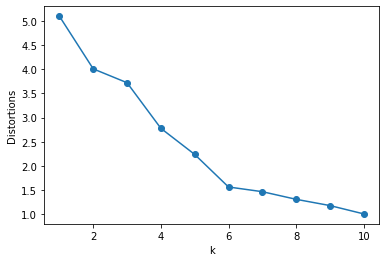

In [90]:
plt.plot(range(1,11), distortions, marker ='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.show()


In [91]:
#from sklearn.cluster import KMeans
#def calculate_WSS (points, kmax):
    #sse=[]
    #for k in range (1, kmax+1):
        #kmeans = KMeans(n_cluster = k).fit(points)
        #centroids=kmeans.cluster_center_
        #pred_clusters=kmeans.predict(points)
        #curr_sse = 0 
        #for i in range (len(points)):
            #curr_center=centroids[pred_cluster[i]]
            #curr_sse += (points[i, 0] - curr_center[0])**2 +(points[i, 1] - curr_center[1])
        #sse.append(curr_sse)
    #return sse

Run *k*-means to cluster the neighborhood into 6 clusters.

In [92]:
# set number of clusters
kclusters = 6

Vancouver_grouped_clustering = Vancouver_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Vancouver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 4, 1, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [93]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Vancouver_merged = Van_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Vancouver_merged = Vancouver_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Vancouver_merged # check the last columns!

,PostalCode,Borough,Neighborhood,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,V5K,Vancouver,"North Hastings, Sunrise",-123.142289,49.303832,4.0,Trail,Park,Lake,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
1,V5L,Vancouver,"North grandview, Woodland",-123.142289,49.303832,4.0,Trail,Park,Lake,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
2,V5M,Vancouver,"South Hastings, Sunrise, North Renfrew- Collin...",-123.034651,49.249830,1.0,Convenience Store,Malay Restaurant,Chinese Restaurant,Supermarket,Sushi Restaurant,Yoga Studio,Falafel Restaurant,Food,Flea Market,Fish Market
3,V5N,Vancouver,"South Grandview, Woodland, Ne Kensington, Ceda...",-123.067986,49.249830,1.0,Vietnamese Restaurant,Burger Joint,Bank,Café,Seafood Restaurant,Sandwich Place,Chinese Restaurant,Grocery Store,Electronics Store,Donut Shop
4,V5P,Vancouver,"SE Kensington, Cedar Cottage, Victoria drive, ...",-123.067984,49.216496,5.0,Middle Eastern Restaurant,Pizza Place,Department Store,Falafel Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
5,V5R,Vancouver,"South Renfrew, Collingwood",-123.139155,49.300742,1.0,Trail,Theme Park Ride / Attraction,Park,Music Venue,History Museum,Bus Station,Playground,Outdoor Sculpture,Other Great Outdoors,Pub
6,V5S,Vancouver,Killarney,-123.034650,49.216497,1.0,Pizza Place,Grocery Store,Deli / Bodega,Recreation Center,Sandwich Place,Shopping Mall,Pharmacy,Video Store,Gym / Fitness Center,Hardware Store
7,V5T,Vancouver,East Mount Pleasant,-123.154222,49.226656,1.0,Bus Stop,Pizza Place,Gift Shop,Park,Bubble Tea Shop,Café,Grocery Store,Food,Flea Market,Fish Market
8,V5V,Vancouver,"West Kensington, Cedar Cottage, North East Ri...",-123.075078,49.249125,1.0,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Breakfast Spot,Grocery Store,Seafood Restaurant,Café,Burger Joint,Smoke Shop,South Indian Restaurant,Chinese Restaurant
9,V5W,Vancouver,"South East Riley, Park Little Mountain, SW Ken...",-123.084651,49.216496,3.0,Business Service,Park,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [94]:
Vancouver_merged_1=Vancouver_merged.dropna()

In [95]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Vancouver_merged_1['Latitude'], Vancouver_merged_1['Longitude'], Vancouver_merged_1['Neighborhood'], Vancouver_merged_1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [96]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 0, Vancouver_merged.columns[[1] + [2] + list(range(5, Vancouver_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Vancouver,"South Shaughnessy, North West Oakridge, North ...",0.0,Italian Restaurant,Bakery,Caribbean Restaurant,Yoga Studio,Falafel Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant


In [97]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 1, Vancouver_merged.columns[[1] + [2] + list(range(5, Vancouver_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Vancouver,"South Hastings, Sunrise, North Renfrew- Collin...",1.0,Convenience Store,Malay Restaurant,Chinese Restaurant,Supermarket,Sushi Restaurant,Yoga Studio,Falafel Restaurant,Food,Flea Market,Fish Market
3,Vancouver,"South Grandview, Woodland, Ne Kensington, Ceda...",1.0,Vietnamese Restaurant,Burger Joint,Bank,Café,Seafood Restaurant,Sandwich Place,Chinese Restaurant,Grocery Store,Electronics Store,Donut Shop
5,Vancouver,"South Renfrew, Collingwood",1.0,Trail,Theme Park Ride / Attraction,Park,Music Venue,History Museum,Bus Station,Playground,Outdoor Sculpture,Other Great Outdoors,Pub
6,Vancouver,Killarney,1.0,Pizza Place,Grocery Store,Deli / Bodega,Recreation Center,Sandwich Place,Shopping Mall,Pharmacy,Video Store,Gym / Fitness Center,Hardware Store
7,Vancouver,East Mount Pleasant,1.0,Bus Stop,Pizza Place,Gift Shop,Park,Bubble Tea Shop,Café,Grocery Store,Food,Flea Market,Fish Market
8,Vancouver,"West Kensington, Cedar Cottage, North East Ri...",1.0,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Breakfast Spot,Grocery Store,Seafood Restaurant,Café,Burger Joint,Smoke Shop,South Indian Restaurant,Chinese Restaurant
11,Vancouver,"West Mount Pleasant, West Riley Park, Little M...",1.0,Coffee Shop,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Grocery Store,Ramen Restaurant,Gym,Sushi Restaurant,Liquor Store
12,Vancouver,"East Fairview, South Cambie",1.0,Park,Deli / Bodega,Flea Market,Coffee Shop,Event Space,Food & Drink Shop,Food,Fish Market,Fast Food Restaurant,Farmers Market
14,Vancouver,"Waterfron, Coal Harbour, Canada Place",1.0,Japanese Restaurant,Dessert Shop,Ramen Restaurant,Breakfast Spot,Café,Harbor / Marina,Seafood Restaurant,Boat or Ferry,Bike Rental / Bike Share,Park
15,Vancouver,"South East West End, Davie Village",1.0,Café,Mexican Restaurant,Bakery,Gay Bar,Indian Restaurant,Japanese Restaurant,Sushi Restaurant,Hotel,Grocery Store,Food Truck


In [98]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 2, Vancouver_merged.columns[[1] + [2] + list(range(5, Vancouver_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Vancouver,"West Fairview, Granvile Iceland, Nort East Sha...",2.0,Bus Stop,Yoga Studio,Falafel Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Event Space


In [99]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 3, Vancouver_merged.columns[[1] + [2] + list(range(5, Vancouver_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Vancouver,"South East Riley, Park Little Mountain, SW Ken...",3.0,Business Service,Park,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
10,Vancouver,"SE Oakridge, East Marpole, South Sunset",3.0,Business Service,Park,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [100]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 4, Vancouver_merged.columns[[1] + [2] +list(range(5, Vancouver_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Vancouver,"North Hastings, Sunrise",4.0,Trail,Park,Lake,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
1,Vancouver,"North grandview, Woodland",4.0,Trail,Park,Lake,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
16,Vancouver,"North West West End, Stanely Park",4.0,Trail,Bus Stop,Park,Garden,Yoga Studio,Falafel Restaurant,Food,Flea Market,Fish Market,Fast Food Restaurant


In [101]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 5, Vancouver_merged.columns[[1] + [2] +list(range(5, Vancouver_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Vancouver,"SE Kensington, Cedar Cottage, Victoria drive, ...",5.0,Middle Eastern Restaurant,Pizza Place,Department Store,Falafel Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market


# Discussion:

### 1. Vancouver neighborhoods 

As Discussed before  the  top 3 neighborhoods in Vancouver with the largest number of venues are: 
1. West Mount Pleasant, West Riley Park, Little Mountain 
2. North West Dunbar, Southlands, Chaldecutt, South University Endowment Lands
3. SW Downtown

All these neighborhoods are included in cluster number 2, which is the biggest cluster, shown in the figure with purple circles. Looking at top 10 most common venues in these neighborhoods, I concluded that Japanese, Chinese, Korean restaurants are the most common restaurants in these neighborhoods. Also, the most common common places in the second biggest cluster in Vancouver, cluster number 5, are Parks, lakes, and trials which attracts many visitors specially during weekends. 

Considering these observations through the analysis of the Vancouver neighborhoods, I would recommend to the chain restaurant to open a new branch in cluster number 2, best neighborhoods are those listed in the top 3 neighborhoods, or in the the neighborhoods within cluster number 5. Also, I recommend to customize the menu to include more Italian, Mexican, Mediterranean style of food. 

### 2. Toronto neighborhoods

Using the similar methodology, I performed the same analysis on city of Toronto (in a separate notebook). I include a discussion of the result of Toronto in this section. 

The top 10 neighborhoods in Toronto with largest number of venues are: 
1. First Canadian Place
2. Harbourfront East, Union Station, Toronto Islands
3. Garden District, Ryerson
4. Toronto Dominion Center, Design Exchange
5. Commerce Court, Victoria Hotel 
6. Stn A P0 Boxes 
7. Richmond, Adelaide, King
8. Church and Wellesley
9. St. James Town 
10. Central Bay Street

All these neighborhoods are included in cluster number 1, which is the biggest cluster, shown in the figure with purple circles. Looking at top 10 most common venues in these neighborhoods, I concluded that Japanese, Chinese, Korean restaurants are the most common restaurants in these neighborhoods. Also, the most common common places in the second biggest cluster in Vancouver, cluster number 5, are Parks, lakes, and trials which attracts many visitors specially during weekends. 

Considering these observations through the analysis of the Vancouver neighborhoods, I would recommend to the chain restaurant to open a new branch in cluster number 2, best neighborhoods are those listed in the top 3 neighborhoods, or in the the neighborhoods within cluster number 5. Also, I recommend to customize the menu to include more Italian, Mexican, Mediterranean style of food. 

# Conclusion:

In this project, I demonstrated how to cluster and segment different neighborhoods in the central part of the city of Toronto and the city of Vancouver based on the venues in these neighborhoods. 
I used the results of this analysis to recommend to a chain restaurant the best neighborhoods in these two cities a new branch an a customized menu which include the foods that are less commonly found in those neighborhoods. 

This project include Boroughs that are limited to the central part of the cities and not includes other interesting Boroughs, For example the data for North Vancouver and West Vancouver with potential attractive places was missing in this analysis. To improve the analysis, I would recommend to collect larger data set which includes other Boroughs to have a better understanding of different neighborhoods in both cities to open more branches in them.  